# Обнаружение мошеннических транзакций

Целевой признак - Class. 1 - мошенническая транзакция, 0 - нормальная.

**Файл с данными: "Fraud_data_transaction.csv"**
https://drive.google.com/file/d/1ZwZIZrsZzxYjSv_pO3bTqxTzhmYI6Xs8/view?usp=sharing

**Цели работы:**

1. Поскольку данные несбалансированы (вы должны проиллюстрировать это), то нужно создать таблицу данных с распределением 50/50 для «мошеннических» и «немошеннических» транзакций. (Алгоритм NearMiss)
2. Определить с каким классификатором будет более высокая точность предсказаний.
3. Создать нейронную сеть и сравнить точность с нашим лучшим классификатором.


**План:**
1. Прочитать данные, создать датафрейм.

2. Предварительная обработка:
a) Масштабирование и распределение;
b) Разделение данных.

3. Простое повторное использование данных (Random oversampling) и уменьшение количества данные в более представленных классах (Undersampling):
a) Распределение и корреляция;
b) Обнаружение аномалий;
c) Снижение размерности и кластеризация (t-SNE);
d) Классификаторы;
e) Более глубокий взгляд на логистическую регрессию;
f) Генерация синтетических данных с SMOTE;

4. Оценка модели логистической регрессии на тестовом наборе.

**Важно!** Данные несбалансированны. Большинство транзакций были немошенническими (99,83%). Покажите это.

Если использовать эти данные без предварительной обработки в качестве основы для прогностических моделей и анализа, можно получить много ошибок, связанные с переобучением.

## Датафрейм

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Fraud_data_transaction.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.isnull().sum().max()

np.int64(0)

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Покажите, что данные несбалансированы.

In [7]:
print('Мошеннических транзакций', df[df['Class'] == 1].shape[0])
print('Не мошеннических транзакций', df[df['Class'] == 0].shape[0])
print(f"Доля не мошеннических транзакций {(1 - df[df['Class'] == 1].shape[0] / df[df['Class'] == 0].shape[0]) * 100:.2f}%")

Мошеннических транзакций 492
Не мошеннических транзакций 284315
Доля не мошеннических транзакций 99.83%


## Масштабирование и распределение
На этом этапе нужно масштабировать столбцы Time и Amount.
Также необходимо создать подвыборку фрейма данных, чтобы иметь равное количество случаев мошенничества и немошенничества, что поможет алгоритмам лучше понять закономерности, которые определяют, является ли транзакция мошенничеством или нет.

**Что такое подвыборка?**
В этом сценарии наша подвыборка будет фреймом данных с соотношением мошеннических и немошеннических транзакций 50/50. Это означает, что ваша подвыборка будет иметь одинаковое количество мошеннических и немошеннических транзакций.

/tmp/ipykernel_4748/3028048997.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')
/tmp/ipykernel_4748/3028048997.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[1], color='b')


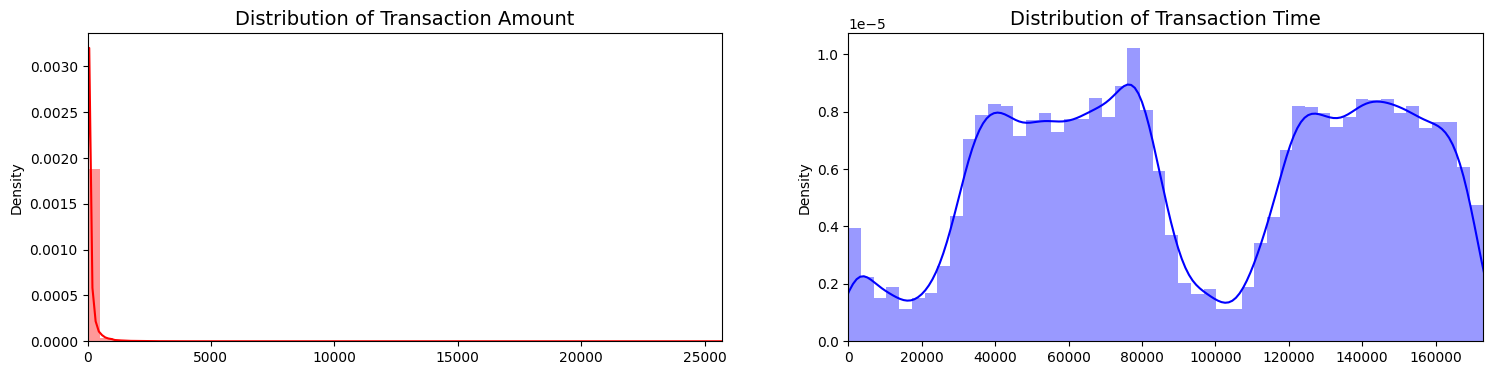

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = std_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = std_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [10]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350151,1.641931
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254117,1.641952
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081839,1.641974
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313249,1.641974


In [11]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Разделение данных


In [12]:
df2 = df.dropna(subset=['Class'])

y = df2['Class']
X = df2.drop(['Class'], axis=1)

In [13]:
from sklearn.model_selection import train_test_split, StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=None, shuffle =False)

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


In [14]:
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

Покажите, что обучающие и тестовые данные распределены одинаково.

In [15]:
import numpy as np

In [16]:
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label / len(original_ytrain))
print(test_counts_label / len(original_ytest))

Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


## Простое повторное использование данных  (Random Under-Sampling):

На этом этапе необходимо реализовать случайную недостаточную выборку, которая заключается в удалении данных для получения более сбалансированного набора данных и, таким образом, избежания переобучения моделей.



Поскольку наши классы сильно перекошены, мы должны сделать их эквивалентными, чтобы иметь нормальное распределение классов.
Перемешайте данные перед созданием подвыборок

In [17]:
df = df.sample(frac=1)
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:df[df['Class'] == 1].shape[0]]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
145238,-0.313289,-0.169808,2.003592,-0.472798,-0.629264,0.175562,-0.258504,0.290366,-0.711575,0.138317,...,-0.167538,0.180542,0.756531,-0.021174,-1.007351,0.014179,-0.169983,0.037636,-0.056416,0
147605,-0.316407,-0.127966,1.917827,0.951967,-2.059206,3.833998,1.668192,0.769826,0.232463,0.107941,...,-0.115922,0.015255,0.239994,-0.111916,-0.380576,0.370995,0.189117,-0.005823,-0.012105,1
184416,-0.293258,0.661622,-1.329959,-0.123651,0.933031,-3.086828,-0.494215,-0.546785,-0.311817,0.351724,...,-0.316675,-0.142919,0.014963,-0.164697,-0.333863,0.897662,-0.106190,0.047456,-0.004645,0
9487,-0.349231,-1.700235,-4.153014,8.204797,-15.031714,10.330100,-3.994426,-3.250013,-10.415698,4.620804,...,1.412625,1.976988,0.256510,0.485908,-1.198821,-0.526567,0.634874,1.627209,0.723235,1
76555,0.260317,-0.804199,-7.901421,2.720472,-7.885936,6.348334,-5.480119,-0.333059,-8.682376,1.164431,...,-0.614719,0.077739,1.092437,0.320133,-0.434643,-0.380687,0.213630,0.423620,-0.105169,1


##  Равномерное распределение и корреляция:

Теперь, когда данные сбалансированы, можно продолжить анализ и предварительную обработку данных.

Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


/tmp/ipykernel_4748/4253638792.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=new_df, palette=colors)


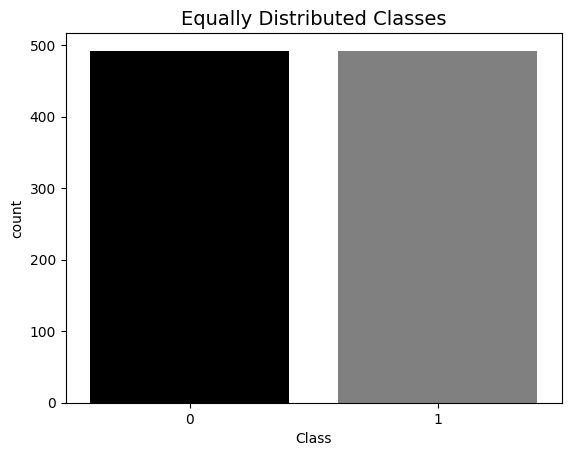

In [18]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

colors = ['black', 'grey']
sns.countplot(x='Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

**Постройте матрицу корреляций для датафрейма df.**

Сделайте выводы о том, каким образом признаки могут влиять на целевую переменную.


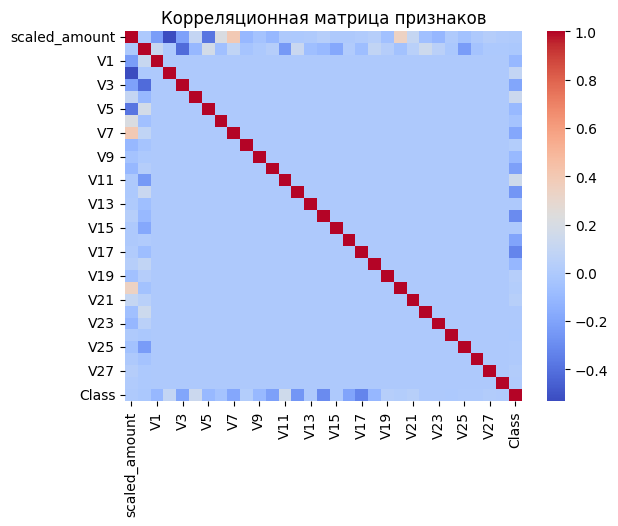

In [19]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Корреляционная матрица признаков')
plt.show()


## Выявление аномалий
Главная цель в этом разделе — удалить «экстремальные выбросы» из признаков, которые имеют высокую корреляцию с нашими классами. Это окажет положительное влияние на точность наших моделей.

### Метод межквартильного размаха:

Мы вычисляем его по разнице между 75-м процентилем и 25-м процентилем. Наша цель — создать порог за пределами 75-го и 25-го процентиля, чтобы в случае, если какой-либо экземпляр превысит этот порог, экземпляр был удален.
Помимо того, что легко увидеть 25-й и 75-й процентили (оба конца квадратов), также легко увидеть экстремальные выбросы (точки за пределами нижнего и верхнего экстремума).

### Компромисс удаления выбросов:

Мы должны быть осторожны с тем, насколько далеко мы хотим установить порог для удаления выбросов. Мы определяем порог, умножая число (например, 1,5) на (межквартильном размахе). Чем выше этот порог, тем меньше выбросов будет обнаружено (умножение на большее число, например, 3), и чем ниже этот порог, тем больше выбросов будет обнаружено.

**Компромисс:** Чем ниже порог, тем больше выбросов он удалит, однако мы хотим больше сосредоточиться на «экстремальных выбросах», а не просто на выбросах.  Вы можете поиграть с этим порогом и посмотреть, как он влияет на точность наших моделей классификации.

### Резюме:

**Визуализация распределений:** Сначала мы начнем с визуализации распределения признака, который мы собираемся использовать для устранения некоторых выбросов. V14 — единственный признак, который имеет гауссово распределение по сравнению с признаками V12 и V10.

**Определение порога:** После того, как мы решим, какое число мы будем использовать для умножения на iqr (чем ниже, тем больше выбросов удаляется), мы продолжим определение верхнего и нижнего порогов, подставляя q25 - порог (нижний экстремальный порог) и добавляя q75 + порог (верхний экстремальный порог).

**Условное отбрасывание:** Наконец, мы создаем условное отбрасывание, утверждая, что если «порог» превышен в обоих крайних значениях, то экземпляры будут удалены.

Представление в виде коробчатой диаграммы: визуализируйте с помощью коробчатой диаграммы, что количество «экстремальных выбросов» было значительно сокращено.

### Примечание:
после внедрения сокращения выбросов наша точность была улучшена более чем на 3%! Некоторые выбросы могут исказить точность наших моделей, но помните, что мы должны избегать экстремальной потери информации, иначе наша модель рискует оказаться недообученной.


/tmp/ipykernel_4748/3538466111.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
/tmp/ipykernel_4748/3538466111.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
/tmp/ipykernel_4748/353846611

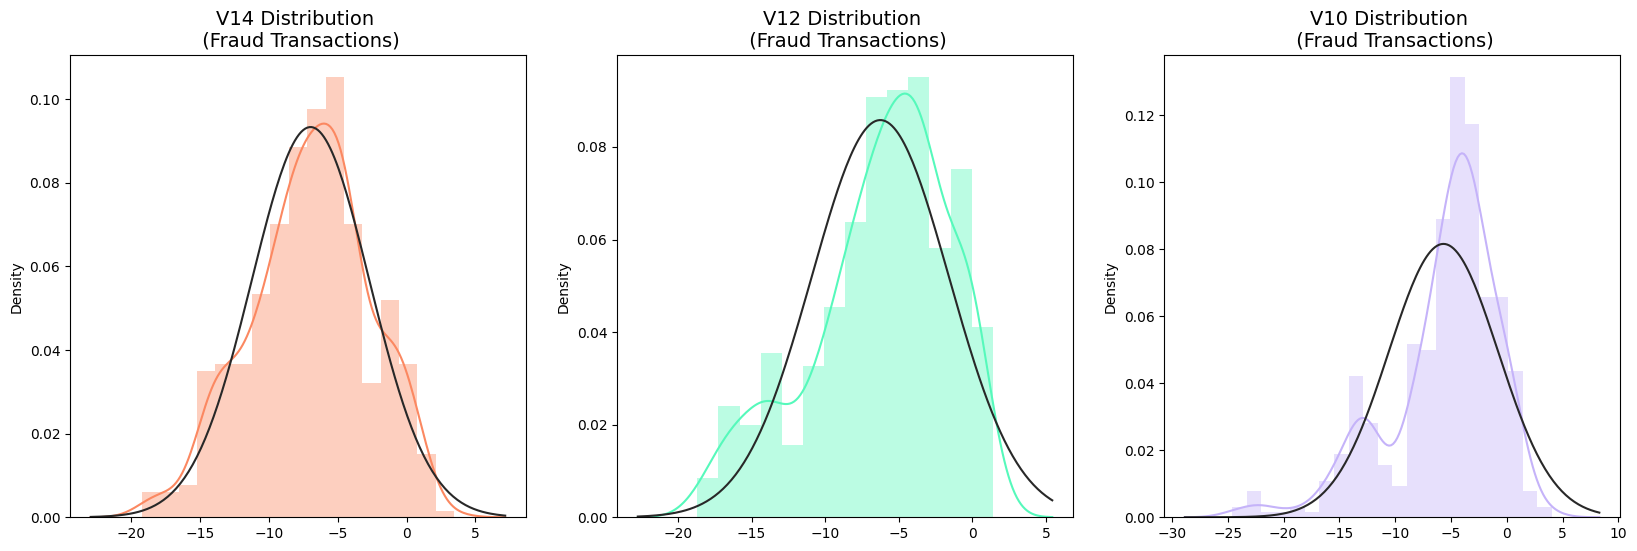

In [20]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [21]:
# # -----> V14 Удаление выбросов (наивысшая отрицательная корреляция с метками)

v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 удаление выбросов из мошеннических транзакций
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Удаление выбросов V10
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[np.float64(-18.8220867423816), np.float64(-18.0499976898594), np.float64(-19.2143254902614), np.float64(-18.4937733551053)]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [np.float64(-18.0475965708216), np.float64(-18.4311310279993), np.float64(-18.5536970096458), np.float64(-18.6837146333443)]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 974
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lo

Boxplots с удаленными выбросами

/tmp/ipykernel_4748/3551892868.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
/tmp/ipykernel_4748/3551892868.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V12", data=new_df,ax=ax2, palette=colors)
/tmp/ipykernel_4748/3551892868.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V10", data=new_df,ax=ax3, palette=colors)


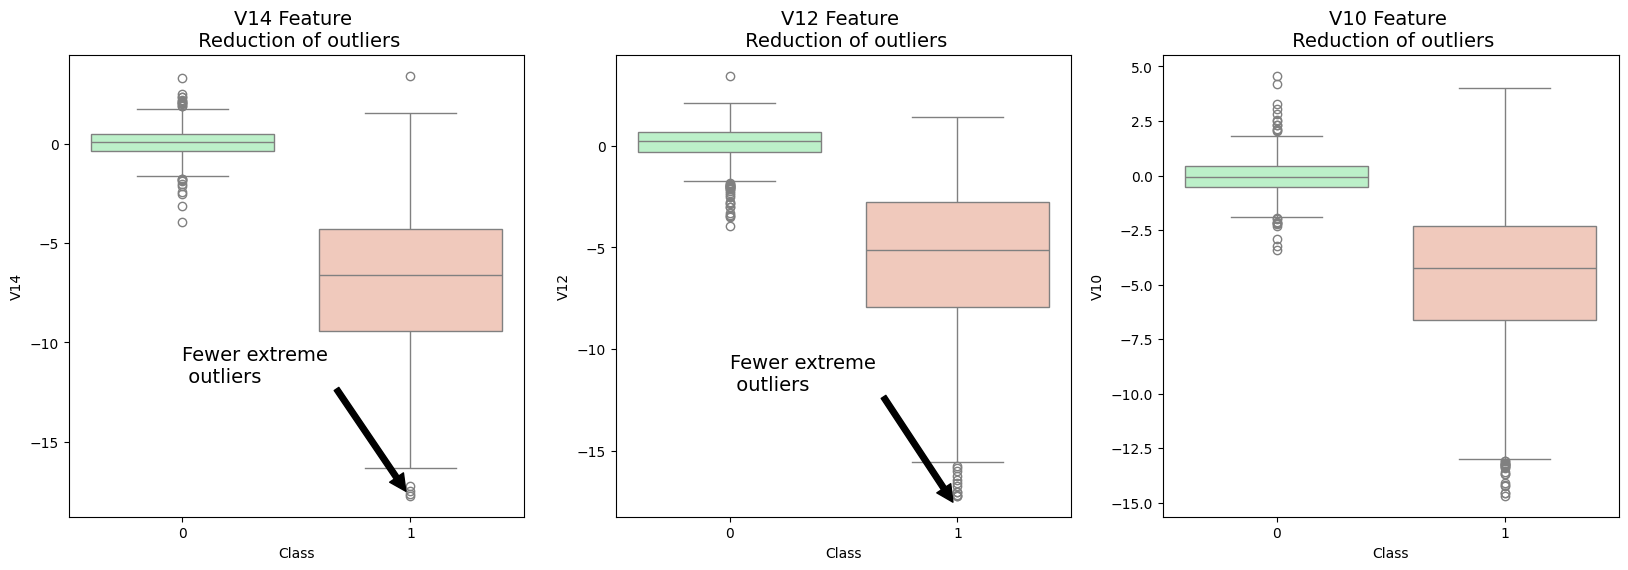

In [22]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df,ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)
# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df,ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

## Снижение размерности и кластеризация. t-SNE


Можете посмотреть видео <a href="https://www.youtube.com/watch?v=NEaUSP4YerM"> StatQuest: t-SNE, Clearly Explained </a> Joshua Starmer

Алгоритм **t-SNE** может довольно точно кластеризовать случаи мошенничества и не мошенничества в нашем наборе данных.
Хотя подвыборка довольно мала, алгоритм **t-SNE** способен довольно точно обнаруживать кластеры в каждом сценарии.
Это дает нам указание на то, что дальнейшие прогностические модели будут работать довольно хорошо при разделении случаев мошенничества и не мошенничества.

In [23]:
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

In [24]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']


t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 2.0 s
PCA took 0.0063 s
Truncated SVD took 0.0024 s


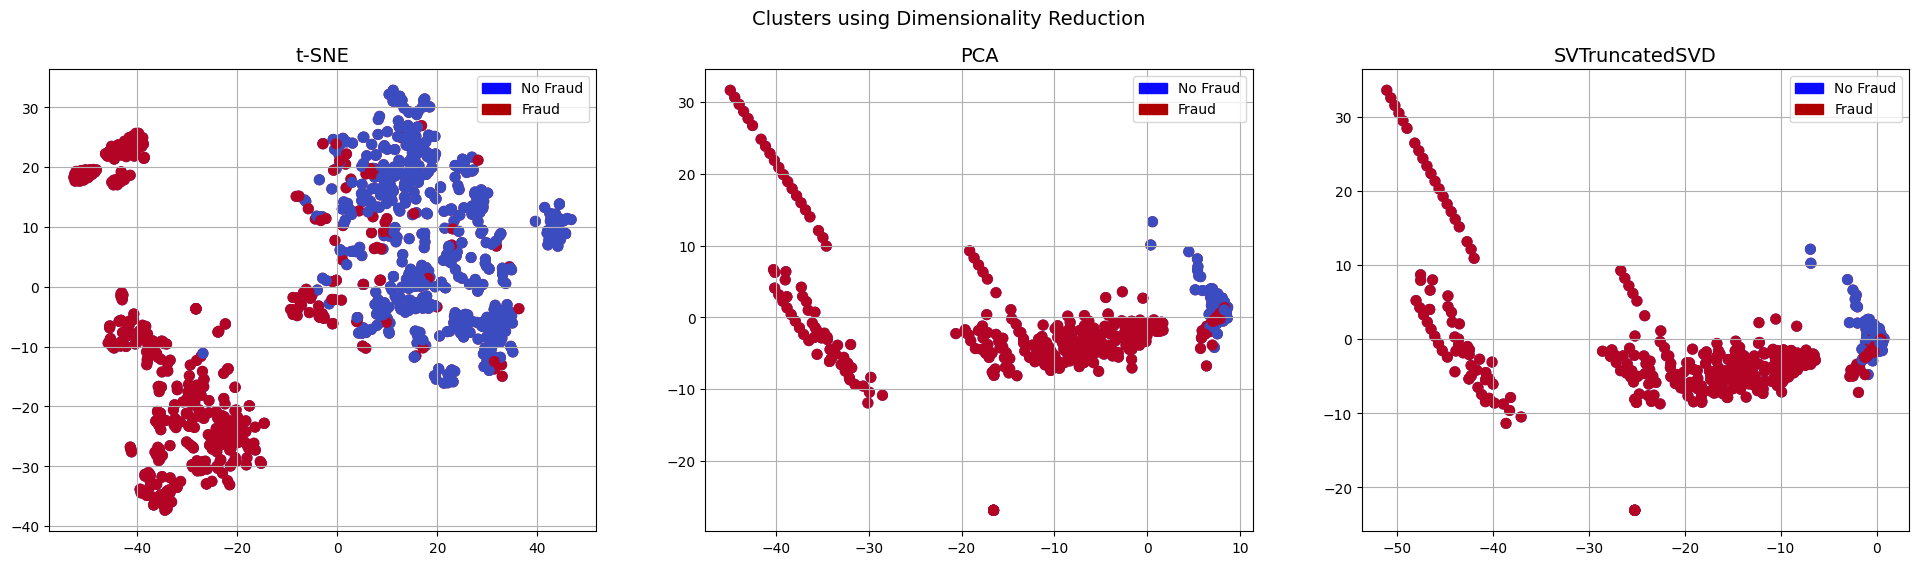

In [25]:
import matplotlib.patches as mpatches

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])
# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('SVTruncatedSVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])


plt.show()

## Классификаторы UnderSampling (недостаточная выборка):


В этом разделе необходимо обучить четыре типа классификаторов и решить какой классификатор будет более эффективен в обнаружении мошеннических транзакций.


1. Классификатор логистической регрессии в большинстве случаев точнее, чем три других классификатора.
2. GridSearchCV используется для определения параметров, которые дают наилучшую прогностическую оценку для классификаторов.
3. Логистическая регрессия имеет наилучшую оценку рабочей характеристики приема (ROC), что означает, что LogisticRegression довольно точно разделяет мошеннические и не мошеннические транзакции.


Чем больше разрыв между оценкой обучения и оценкой перекрестной проверки, тем больше вероятность того, что ваша модель переобучается (высокая дисперсия).
Если оценка низкая как в обучающем наборе, так и в наборе для перекрестной проверки, это указывает на то, что  модель недостаточно обучена (высокое смещение)
Логистический регрессионный классификатор показывает лучшую оценку как в обучающем наборе, так и в наборе для перекрестной проверки.

In [26]:
# Недостаточная выборка перед перекрестной проверкой (склонна к переобучению)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

Данные уже масштабированы, их следует разделить на обучающие и тестовые наборы

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=None, shuffle =False)

In [28]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

Простые классификаторы

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

Реализуем перекрестную валидацию

In [30]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 89.0 % accuracy score


In [31]:
# Используйте GridSearchCV для поиска наилучших параметров.
from sklearn.model_selection import GridSearchCV


# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)

log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Классификатор опорных векторов
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# Деревья решений
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

/home/poha/Рабочий стол/Coding/project_for_vs/analise_data/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/poha/Рабочий стол/Coding/project_for_vs/analise_data/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solve

In [32]:
# Случай переобучения

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('SVC Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('Tree Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

/home/poha/Рабочий стол/Coding/project_for_vs/analise_data/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/poha/Рабочий стол/Coding/project_for_vs/analise_data/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solve

Logistic Regression Cross Validation Score:  93.75%
Knears Neighbors Cross Validation Score 93.61%
SVC Cross Validation Score 93.48%
Tree Cross Validation Score 92.94%


**Undersample** с перекрестной проверкой

In [33]:
df = df.dropna(subset=['Class'])
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]

undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

Train: [ 55150  55193  55280 ... 284804 284805 284806] Test: [    0     1     2 ... 56964 56965 56966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 55150  55193  55280 ... 113927 113928 113929]
Train: [     0      1      2 ... 284804 284805 284806] Test: [110768 111169 112515 ... 176502 177522 177575]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170878 170879 170880 ... 227844 227845 227846]
Train: [     0      1      2 ... 227844 227845 227846] Test: [227302 227847 227848 ... 284804 284805 284806]


Реализация метода **NearMiss**

In [34]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from collections import Counter

In [35]:
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))


for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])

    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(accuracy_score(original_ytrain[test], undersample_prediction))

NearMiss Label Distribution: Counter({np.int64(0): 492, np.int64(1): 492})


/home/poha/Рабочий стол/Coding/project_for_vs/analise_data/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/poha/Рабочий стол/Coding/project_for_vs/analise_data/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solve

Plot LogisticRegression Learning Curve

In [36]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)

    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    # Second Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")

    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("SVC Cross Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")

    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Tree Cross Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")

    return plt

/home/poha/Рабочий стол/Coding/project_for_vs/analise_data/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/poha/Рабочий стол/Coding/project_for_vs/analise_data/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solve

<module 'matplotlib.pyplot' from '/home/poha/Рабочий стол/Coding/project_for_vs/analise_data/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

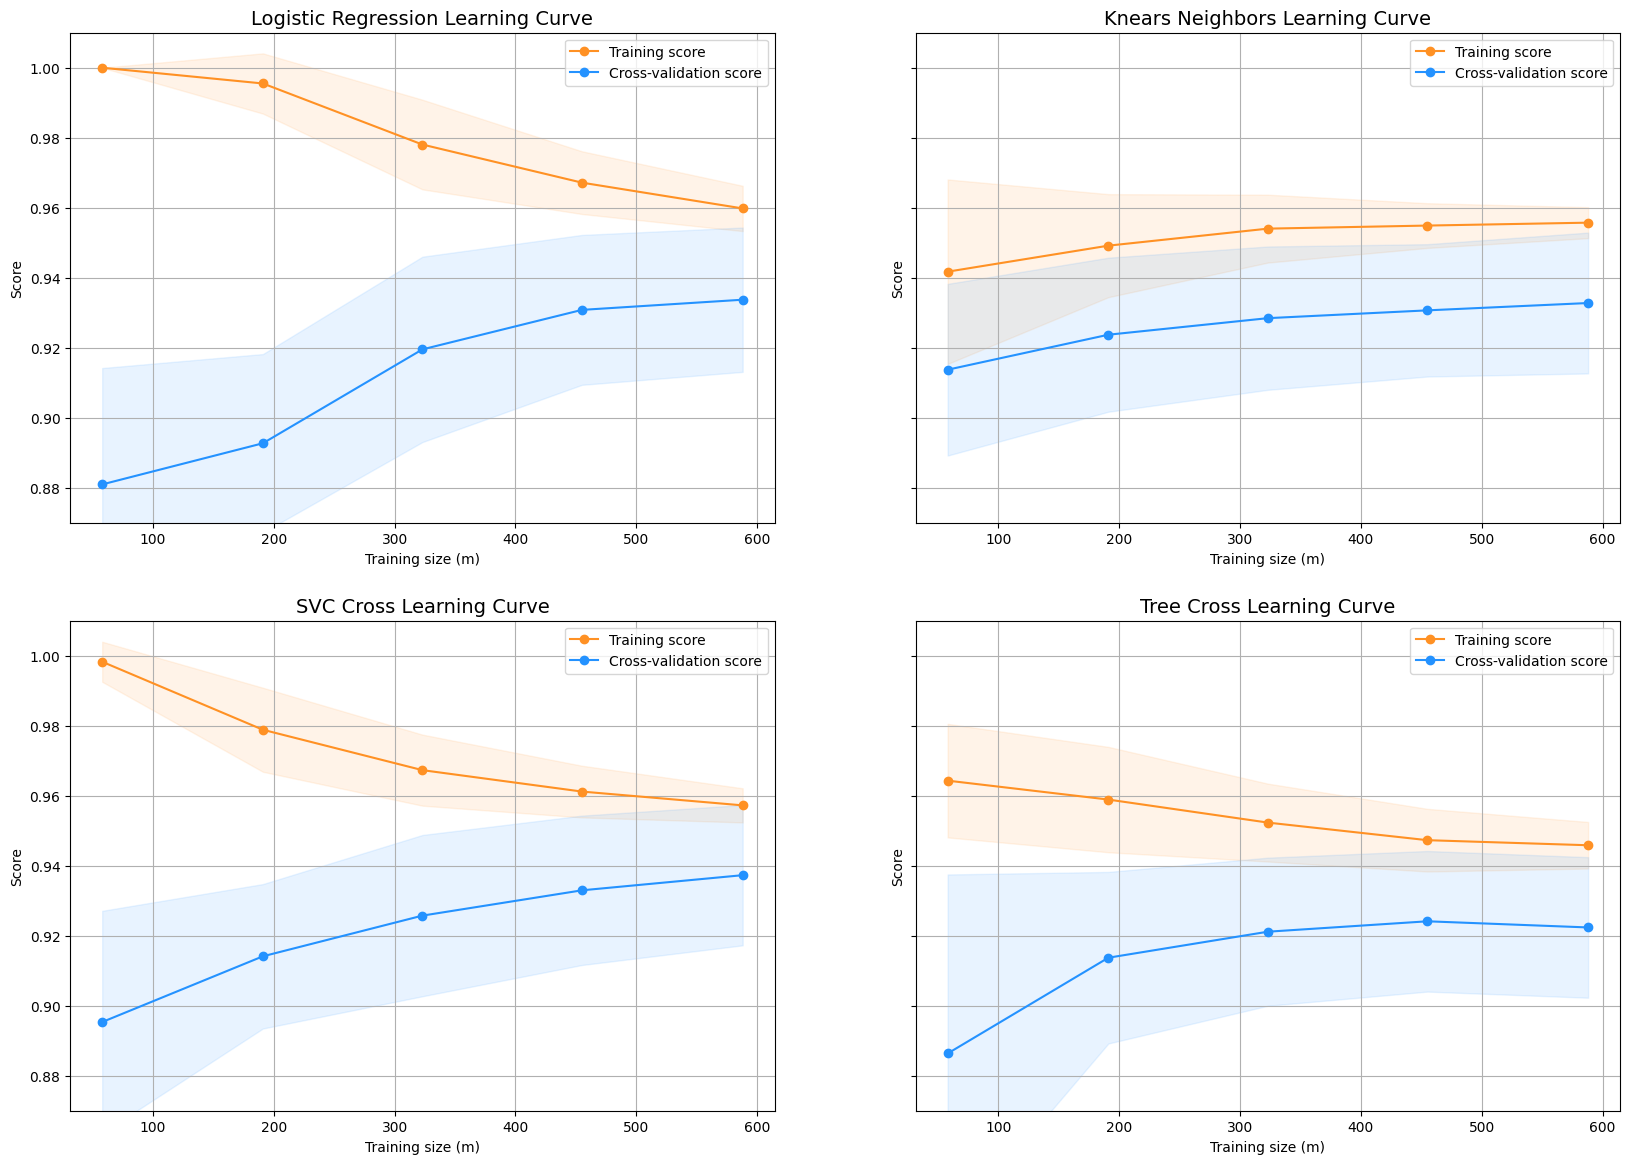

In [37]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

Создайте DataFrame со всеми оценками и именами классификаторов.

In [38]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict


log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5)

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5)

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

/home/poha/Рабочий стол/Coding/project_for_vs/analise_data/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/poha/Рабочий стол/Coding/project_for_vs/analise_data/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solve

In [39]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('Knears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('SVC: ', roc_auc_score(y_train, svc_pred))
print('Tree: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9367937148474165
Knears Neighbors:  0.9347427625403723
SVC:  0.9335860993473906
Tree:  0.9277399614199241


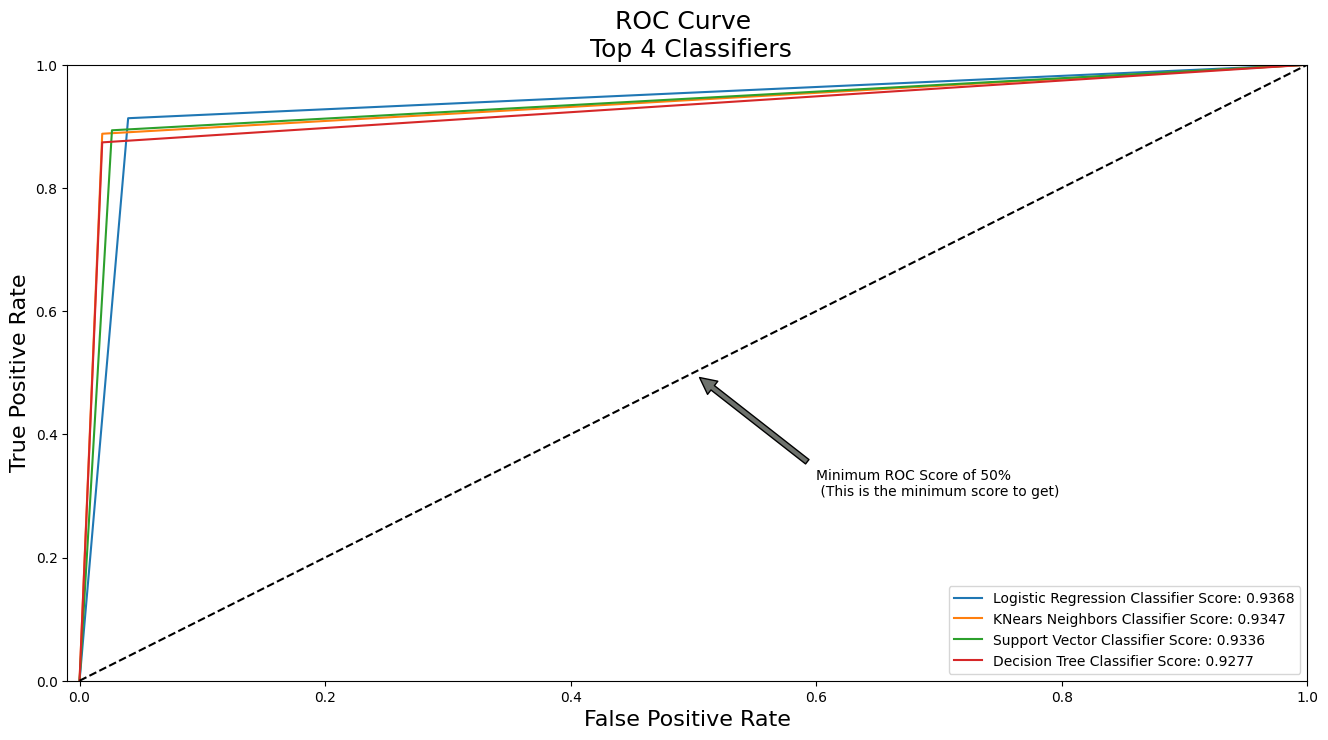

In [40]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

## Более детальный взгляд на логистическую регрессию

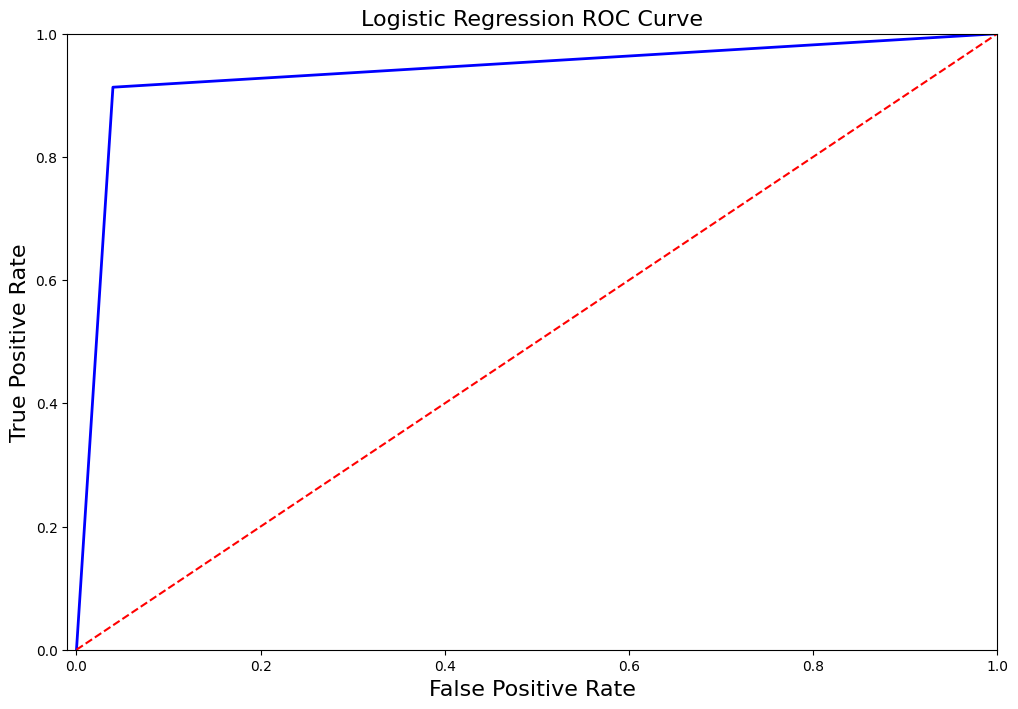

In [41]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])


logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [42]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [43]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)


print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.97
Precision Score: 0.69
F1 Score: 0.81
Accuracy Score: 0.77
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.55
Precision Score: 0.00
Recall Score: 0.46
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


In [44]:
undersample_y_score = log_reg.decision_function(original_Xtest)

In [45]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.01


### Вывод: Текущая модель логистической регрессии не подходит для практического использования из-за проблем с переобучением и плохими метриками на тестовых данных.

### Метод SMOTE Over-Sampling (избыточная выборка):

В отличие от случайной недостаточной выборки, SMOTE создает новые синтетические точки для достижения равного баланса классов. Это еще один вариант решения «проблем дисбаланса классов».

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))


accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []


log_reg_sm = LogisticRegression()

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961


 ### Реализация техники SMOTE

In [47]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='auto'), rand_log_reg)
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])

    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))

print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

/home/poha/Рабочий стол/Coding/project_for_vs/analise_data/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/poha/Рабочий стол/Coding/project_for_vs/analise_data/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/poha/Рабочий стол/Coding/project_for_vs/analise_data/.venv/lib/python3.12/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^

---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9431069594629935
precision: 0.06173584676816189
recall: 0.9162934112301201
f1: 0.11389137396307869
---------------------------------------------------------------------------------------------------------------------------------------


In [48]:
from sklearn.metrics import classification_report

labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.12      0.86      0.21        98

    accuracy                           0.99     56961
   macro avg       0.56      0.92      0.60     56961
weighted avg       1.00      0.99      0.99     56961



In [49]:
y_score = log_reg.decision_function(original_Xtest)

In [50]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.01


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.01')

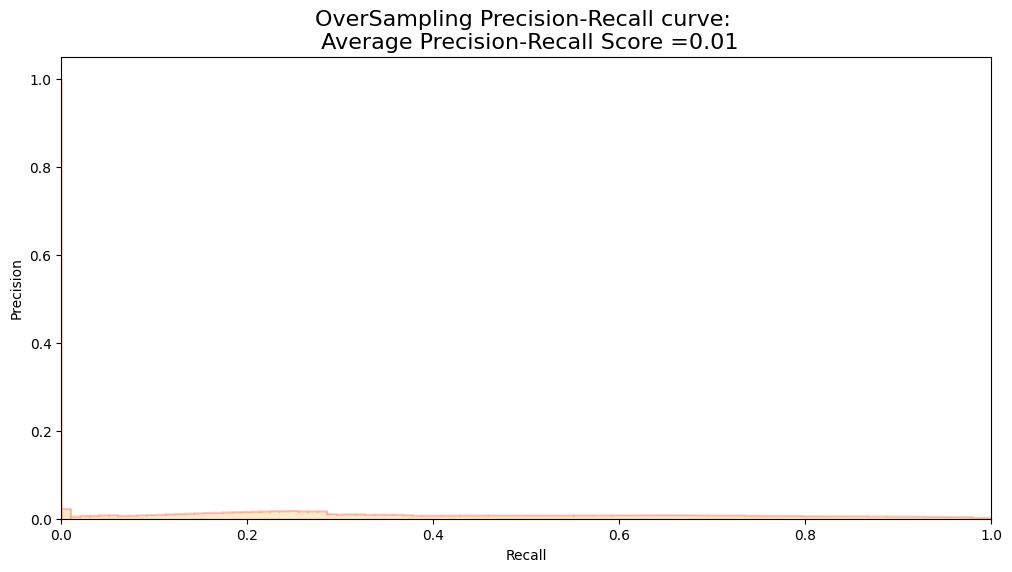

In [51]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

# Тестовые данные с логистической регрессией:

In [52]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)

Для всех предсказаний постройте матрицу спутааности (confusion_matrix)


=== Training Logistic Regression ===
Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
F1 Score: 0.9721
Training time: 2.52 seconds
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        98
           1       0.99      0.96      0.97        91

    accuracy                           0.97       189
   macro avg       0.97      0.97      0.97       189
weighted avg       0.97      0.97      0.97       189



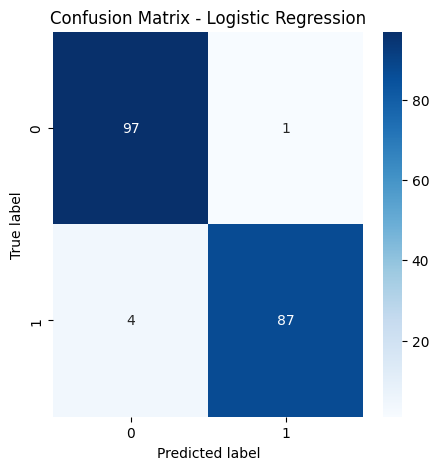


=== Training KNeighbors ===
Best parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
F1 Score: 0.9605
Training time: 0.35 seconds
              precision    recall  f1-score   support

           0       0.94      0.99      0.97        98
           1       0.99      0.93      0.96        91

    accuracy                           0.96       189
   macro avg       0.97      0.96      0.96       189
weighted avg       0.96      0.96      0.96       189



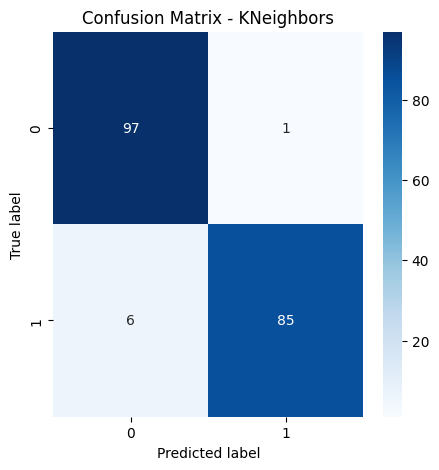


=== Training SVM ===
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
F1 Score: 0.9724
Training time: 0.35 seconds
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        98
           1       0.98      0.97      0.97        91

    accuracy                           0.97       189
   macro avg       0.97      0.97      0.97       189
weighted avg       0.97      0.97      0.97       189



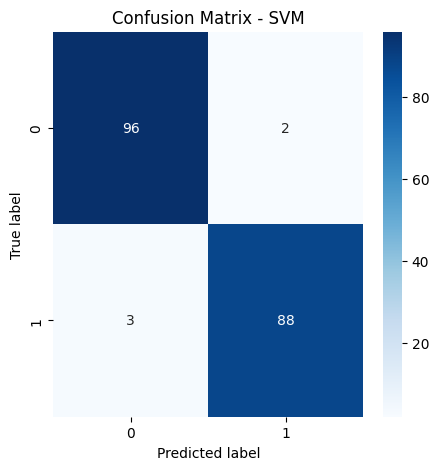


=== Training Decision Tree ===
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5}
F1 Score: 0.9206
Training time: 0.35 seconds
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        98
           1       0.89      0.96      0.92        91

    accuracy                           0.92       189
   macro avg       0.92      0.92      0.92       189
weighted avg       0.92      0.92      0.92       189



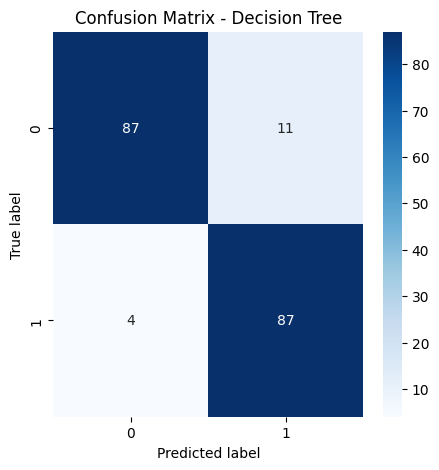


=== Training Random Forest ===
Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
F1 Score: 0.9659
Training time: 4.20 seconds
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        98
           1       1.00      0.93      0.97        91

    accuracy                           0.97       189
   macro avg       0.97      0.97      0.97       189
weighted avg       0.97      0.97      0.97       189



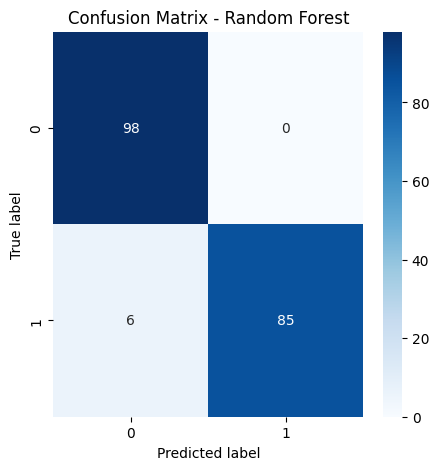


=== Training XGBoost ===
Best parameters: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200}
F1 Score: 0.9724
Training time: 2.80 seconds
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        98
           1       0.98      0.97      0.97        91

    accuracy                           0.97       189
   macro avg       0.97      0.97      0.97       189
weighted avg       0.97      0.97      0.97       189



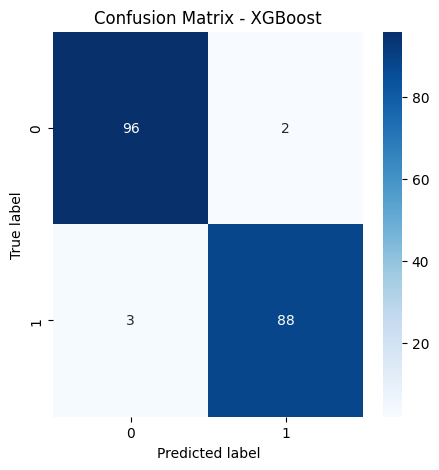


=== Final Model Comparison ===
                 Model                                        Best Params  \
5              XGBoost  {'learning_rate': 0.01, 'max_depth': 6, 'n_est...   
2                  SVM    {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}   
0  Logistic Regression   {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}   
4        Random Forest  {'max_depth': 10, 'min_samples_split': 2, 'n_e...   
1           KNeighbors  {'metric': 'euclidean', 'n_neighbors': 9, 'wei...   
3        Decision Tree  {'criterion': 'entropy', 'max_depth': 10, 'min...   

   F1 Score  Training Time (s)  
5  0.972376           2.798930  
2  0.972376           0.347160  
0  0.972067           2.515992  
4  0.965909           4.203784  
1  0.960452           0.347289  
3  0.920635           0.352760  


In [53]:
import time
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
Xsm_train, ysm_train = smote.fit_resample(X_train, y_train)

models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'penalty': ['l1', 'l2'],
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'solver': ['liblinear']
        }
    },
    'KNeighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'criterion': ['gini', 'entropy']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 6],
            'learning_rate': [0.01, 0.1]
        }
    }
}

results = []
best_models = {}

for name, config in models.items():
    print(f"\n=== Training {name} ===")
    t0 = time.time()

    grid = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=5,
        scoring='f1',
        n_jobs=-1
    )
    grid.fit(Xsm_train, ysm_train)

    best_model = grid.best_estimator_
    best_models[name] = best_model

    y_pred = best_model.predict(X_test)
    f1 = f1_score(y_test, y_pred)

    t1 = time.time()
    training_time = t1 - t0

    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'F1 Score': f1,
        'Training Time (s)': training_time
    })

    print(f"Best parameters: {grid.best_params_}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Training time: {training_time:.2f} seconds")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

results_df = pd.DataFrame(results)
print("\n=== Final Model Comparison ===")
print(results_df.sort_values('F1 Score', ascending=False))


И "classification_report"

In [54]:
from sklearn.metrics import classification_report


print("\n" + "="*50)
print("Подробный отчет классификации")
print("="*50)

print(classification_report(y_test, y_pred))

print(classification_report(y_test, y_pred,
                          target_names=['Не мошенничество', 'Мошенничество'],
                          digits=4))

report_dict = classification_report(y_test, y_pred, output_dict=True)
print(f"\nF1-score для класса 1: {report_dict['1']['f1-score']:.4f}")


Подробный отчет классификации
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        98
           1       0.98      0.97      0.97        91

    accuracy                           0.97       189
   macro avg       0.97      0.97      0.97       189
weighted avg       0.97      0.97      0.97       189

                  precision    recall  f1-score   support

Не мошенничество     0.9697    0.9796    0.9746        98
   Мошенничество     0.9778    0.9670    0.9724        91

        accuracy                         0.9735       189
       macro avg     0.9737    0.9733    0.9735       189
    weighted avg     0.9736    0.9735    0.9735       189


F1-score для класса 1: 0.9724


Итоговая оценка логистической регрессии для тестового набора

Logistic Regression with Random Undersampling

Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.96      0.98      0.97        98
       Fraud       0.98      0.96      0.97        91

    accuracy                           0.97       189
   macro avg       0.97      0.97      0.97       189
weighted avg       0.97      0.97      0.97       189


Key Metrics:
Accuracy: 0.9683
Precision: 0.9775
Recall/Sensitivity: 0.9560
F1-Score: 0.9667

Logistic Regression with SMOTE Technique

Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.96      0.99      0.97        98
       Fraud       0.99      0.96      0.97        91

    accuracy                           0.97       189
   macro avg       0.97      0.97      0.97       189
weighted avg       0.97      0.97      0.97       189


Key Metrics:
Accuracy: 0.9735
Precision: 0.9886
Recall/Sensitivity: 0.9560
F1-Score: 0.9721

Model Comparison: Under

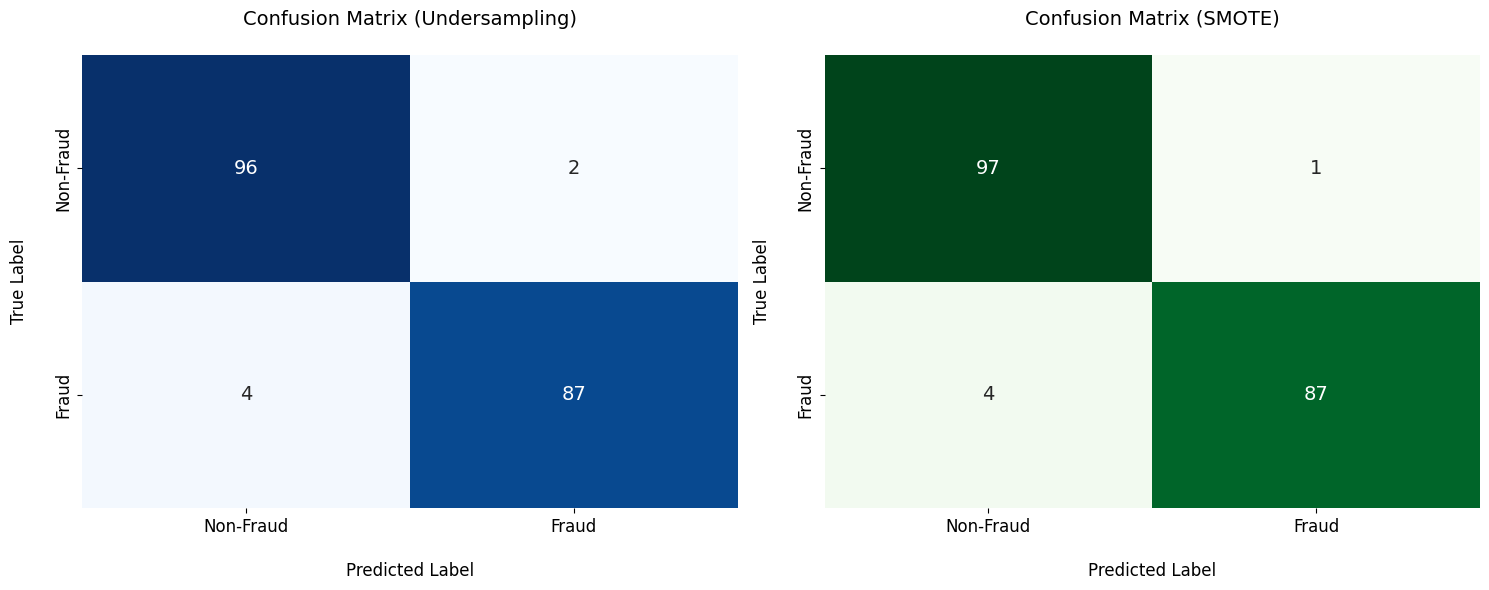

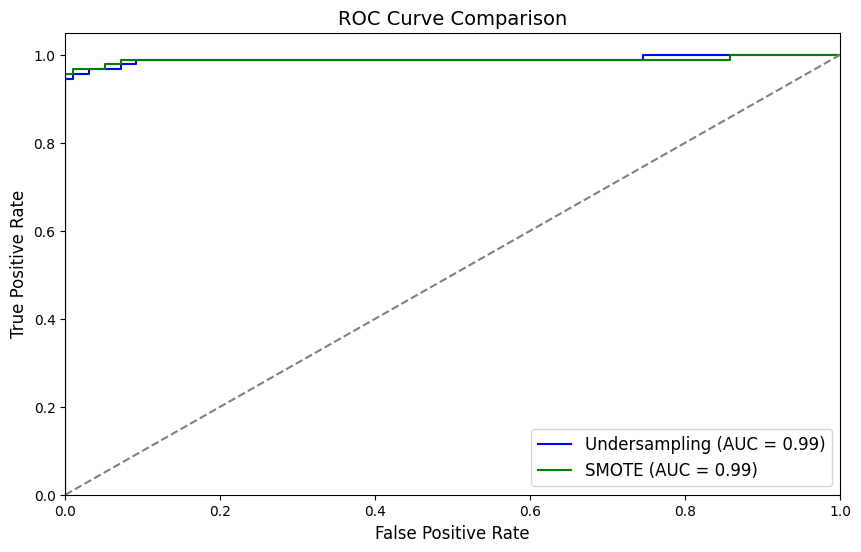

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. Логистическая регрессия с Undersampling
print("="*60)
print("Logistic Regression with Random Undersampling")
print("="*60)

# Применяем undersampling
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X_train, y_train)

# Обучаем модель
log_reg_under = LogisticRegression(max_iter=1000, random_state=42)
log_reg_under.fit(X_under, y_under)
y_pred_under = log_reg_under.predict(X_test)

# Оценка модели
print("\nClassification Report:")
print(classification_report(y_test, y_pred_under, target_names=['Non-Fraud', 'Fraud']))

print("\nKey Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_under):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_under):.4f}")
print(f"Recall/Sensitivity: {recall_score(y_test, y_pred_under):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_under):.4f}")

# 2. Логистическая регрессия с SMOTE
print("\n" + "="*60)
print("Logistic Regression with SMOTE Technique")
print("="*60)

# Применяем SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Обучаем модель
log_reg_smote = LogisticRegression(max_iter=1000, random_state=42)
log_reg_smote.fit(X_smote, y_smote)
y_pred_smote = log_reg_smote.predict(X_test)

# Оценка модели
print("\nClassification Report:")
print(classification_report(y_test, y_pred_smote, target_names=['Non-Fraud', 'Fraud']))

print("\nKey Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_smote):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_smote):.4f}")
print(f"Recall/Sensitivity: {recall_score(y_test, y_pred_smote):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_smote):.4f}")

# 3. Сравнение результатов
print("\n" + "="*60)
print("Model Comparison: Undersampling vs SMOTE")
print("="*60)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
undersample_values = [
    accuracy_score(y_test, y_pred_under),
    precision_score(y_test, y_pred_under),
    recall_score(y_test, y_pred_under),
    f1_score(y_test, y_pred_under)
]
smote_values = [
    accuracy_score(y_test, y_pred_smote),
    precision_score(y_test, y_pred_smote),
    recall_score(y_test, y_pred_smote),
    f1_score(y_test, y_pred_smote)
]

comparison_df = pd.DataFrame({
    'Metric': metrics,
    'Undersampling': undersample_values,
    'SMOTE': smote_values,
    'Difference': np.array(smote_values) - np.array(undersample_values)
})

# Форматируем вывод
pd.options.display.float_format = '{:.4f}'.format
print(comparison_df)

# 4. Визуализация матриц ошибок
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Матрица для Undersampling
cm_under = confusion_matrix(y_test, y_pred_under)
sns.heatmap(cm_under, annot=True, fmt='d', cmap='Blues', ax=ax1,
            annot_kws={"size": 14}, cbar=False)
ax1.set_title('Confusion Matrix (Undersampling)\n', fontsize=14)
ax1.set_xlabel('\nPredicted Label', fontsize=12)
ax1.set_ylabel('True Label\n', fontsize=12)
ax1.xaxis.set_ticklabels(['Non-Fraud', 'Fraud'], fontsize=12)
ax1.yaxis.set_ticklabels(['Non-Fraud', 'Fraud'], fontsize=12)

# Матрица для SMOTE
cm_smote = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Greens', ax=ax2,
            annot_kws={"size": 14}, cbar=False)
ax2.set_title('Confusion Matrix (SMOTE)\n', fontsize=14)
ax2.set_xlabel('\nPredicted Label', fontsize=12)
ax2.set_ylabel('True Label\n', fontsize=12)
ax2.xaxis.set_ticklabels(['Non-Fraud', 'Fraud'], fontsize=12)
ax2.yaxis.set_ticklabels(['Non-Fraud', 'Fraud'], fontsize=12)

plt.tight_layout()
plt.show()

# 5. ROC-кривые (если нужны вероятности)
if hasattr(log_reg_under, "predict_proba"):
    from sklearn.metrics import roc_curve, auc

    plt.figure(figsize=(10, 6))

    # ROC для Undersampling
    y_prob_under = log_reg_under.predict_proba(X_test)[:, 1]
    fpr_under, tpr_under, _ = roc_curve(y_test, y_prob_under)
    roc_auc_under = auc(fpr_under, tpr_under)
    plt.plot(fpr_under, tpr_under, color='blue',
             label=f'Undersampling (AUC = {roc_auc_under:.2f})')

    # ROC для SMOTE
    y_prob_smote = log_reg_smote.predict_proba(X_test)[:, 1]
    fpr_smote, tpr_smote, _ = roc_curve(y_test, y_prob_smote)
    roc_auc_smote = auc(fpr_smote, tpr_smote)
    plt.plot(fpr_smote, tpr_smote, color='green',
             label=f'SMOTE (AUC = {roc_auc_smote:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('ROC Curve Comparison', fontsize=14)
    plt.legend(loc="lower right", fontsize=12)
    plt.show()

**Сделайте выводы**
---

Проект успешно решает задачу обнаружения мошеннических транзакций с помощью машинного обучения, применяя предобработку данных, балансировку классов (SMOTE) и логистическую регрессию. Использование SMOTE позволило эффективно сбалансировать классы и улучшить результаты модели. Визуализация данных и результатов моделирования способствует наглядности анализа. Однако, применение NearMiss до кросс-валидации может привести к переоценке модели, а первоначальная модель логистической регрессии страдала от переобучения. Рекомендуется применять SMOTE внутри кросс-валидации, оптимизировать гиперпараметры всех моделей, исследовать ансамблевые методы и продолжить анализ признаков. В целом, проект демонстрирует хороший подход и с учетом рекомендаций модель может быть доработана для практического применения.